<a href="https://colab.research.google.com/github/Martinccv/Clases-DS/blob/main/Clase29_NLP_2_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter API

La última clase vimos como registrarnos como developers en twitter. Ahora, utilizaremos las key obtenidas para extraer tweets y analizarlos.

Para esto, utilizaremos la librería tweepy (debemos instalarla)

Algunos links útiles:

- https://developer.twitter.com/en/portal/dashboard
- https://docs.tweepy.org/en/v3.5.0/api.html?highlight=search#API.search

Primero que nada instalamos tweepy:

In [ ]:
!pip install tweepy

Ahora, para hacer una request a la API de twitter, necesitaremos utilizar nuestras access keys. En la siguiente celda, poner sus keys obtenidas en el portal de tweeter developer.

*En caso de que no tengan cuenta de desarrollador en twitter, evitar esta parte.

In [ ]:
api_key = '###'
api_secret = '###'
access_token = "###"
access_token_secret = "###"

bearer_token='###'

Ahora con nuestras keys podemos autenticarnos:

In [ ]:
import tweepy

In [ ]:
api = tweepy.Client(bearer_token=bearer_token,consumer_key=consumer_key,consumer_secret=consumer_secret,access_token=access_token, access_token_secret=access_token_secret)

NameError: name 'consumer_key' is not defined

Si la celda anterior no les dio error, ya deberían estar autenticados.

Ahora con el siguiente código, podemos extraer por ejemplo algunos tweets de "get_home_timeline" (la página principal que aparece cuando iniciamos sesión en twitter).

In [ ]:
tweets = api.get_home_timeline()

Unauthorized: 401 Unauthorized
Unauthorized

In [ ]:
for tweet in list(tweets)[0]:
    print(tweet)
    print("----")

NameError: name 'tweets' is not defined

In [ ]:
tweets

Response(data=[<Tweet id=1596985880966991872 text='🚨 ATENCIÓN \n\n👉🏻 ¿Cómo quedó el Grupo C luego del triunfo de Argentina? \n\n📋Polonia ocupa el primer puesto. Si Argentina empata el miércoles la clasificación dependerá del partido entre México y Arabia Saudita, que jugará aquel día en el mismo horario.\n\n📲 https://t.co/9fxDe5Kt8s https://t.co/LcfLdaHcum'>, <Tweet id=1596985465864863745 text='Four professors, who formed the No Club, write for @NatureCareers that they’ve learned that when women refuse requests to do unrewarded tasks, another female colleague often gets asked instead. https://t.co/r1K2Gbyy6J'>, <Tweet id=1596985263921799169 text='RT @ucsbNLP: Our MS student Eddie Zhang will be presenting "LAD: Language Augmented Diffusion for Reinforcement Learning" at #NeurIPS 2022…'>, <Tweet id=1596984710688907265 text='El Gobierno ucraniano anunció la estabilización del sistema energético tras los bombardeos rusos https://t.co/BtG8aFCdyn'>, <Tweet id=1596984144436699136 text='El mis

Otra cosa que podemos hacer, es extraer tweets por keyword.

Por ejemplo:

In [ ]:
query = 'FIFA World Cup -lang: es'
tweets = api.search_recent_tweets(query=query, max_results=10)
for tweet in tweets.data:
    print(tweet.text)

ワールドカップスワップス
トークン３２／５０（？）

ストア
「FIFA World Cup 基礎パック」
75000コインor500FIFAポイント
期間：～11/30 3:00

LARADE 🇫🇷

FIFA23 FUT WC Ｗ杯
ワールドカップ スワップ https://t.co/MoW4K3UhpH
FIFA World Cup 2022 live - Brazil vs Switzerland live - Football Live Today

🅻🅸🆅🅴✅►https://t.co/QqsskwSz0G

dfgvfdxzbgvdfv
RT @GulfTimes_QATAR: The Ministry of Interior building is brought to life through motion art projections and synced music, celebrating Qata…
RT @Barca_Buzz: Today's results in the 2022 FIFA World Cup.

Japan 0-1 Costa Rica.

Belgium 0-2 Morocco.

Croatia 4-1 Canada.

Spain 1-1 Ge…
FIFA World Cup 2022 live - Brazil vs Switzerland live - Football Live Today

🅻🅸🆅🅴✅►https://t.co/QqsskwSz0G

dfhsgchbf
RT @AfricaFactsZone: Morocco's Atlas Lions have defeated Belgium 2-0 at the FIFA World Cup in Qatar.

Moroccan club, Wydad Casablanca won t…
Humor may be in jeopardy these days but you know what's a true undeniably-epic joke?

FIFA World Cup.

Give up, Middle-East, you're an embarrassment to the word "embarrassment."
F

Mediante la API de twitter también se puede publicar cosas, marcar favoritos, enviar mensajes, etc etc. Pero está fuera del alcance de esta clase. Por el momento nos interesa extraer tweets para tener datos para analizar.

Vamos a extraer 500 tweets sobre 'FIFA World Cup' y analizarlos con lo que vimos en la parte teórica de hoy.

EJERCICIO: Basándose en el código de arriba, extraer 100 tweets sobre covid, guardarlos en una lista y luego en un dataframe de pandas.

El dataframe debe tener la columna: "TWEET".

Arranquemos armando la lista de tweets:

In [ ]:
query = 'FIFA World Cup -lang: es'
mundial_tweets = api.search_recent_tweets(query=query, max_results=100)

tweets_list = []


In [ ]:
for tw in list(mundial_tweets)[0]:
  tw_text = tw.text
  tweets_list.append(tw_text)

Validar que el largo de la lista sea 100:

In [ ]:
len(tweets_list)

100

Imprimir los primeros 5 tweets de la lista:

In [ ]:
tweets_list[:15]

['Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq',
 'RT @FIFAWorldCup: 정국 (Jung Kook) "Dreamers" Official Music Video | FIFA World Cup 2022 Official Soundtrack\n\nhttps://t.co/2vjhri8x19\n\n#Dream…',
 "RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FIFA World Cup opening ceremony ha superado 30 Millones de vistas en Y0uTube.\n\n🔗https://t.co/Mt0t…",
 'RT @Jungkook_SNS: “Dreamers” by JungKook is now the Most Used FIFA World Cup song audio on Instagram, surpassing “Waka Waka” by Shakira. It…',
 'RT @SerieTV46: "Dreamers (FIFA World Cup 2022 Soundtrack)" by #JUNGKOOK of @BTS_twt feat. Fahad Al Kubaisi it\'s the most viewed MV in last…',
 '⚽️ FIFA World Cup 🌍\n\n1 unit: Serbia 🇷🇸 -0.75 (vs. Cameroon 🇨🇲) @ 1.989 / -101',
 'That’s right! There is NO DRINKING at this years World Cup taking place in #Qatar ⚽️ #fifa #worldcup #worldcup2022 https://t.co/O0FEB3Cid8',
 'RT @charts_k: .@BTS_twt Jungkook’s FIFA World Cup Opening Ceremony performance has been 

A simple vista... ¿Cuáles son los principales desafíos que ven a la hora de trabajar con textos como estos?

Ahora crear un dataframe de pandas a partir de la lista de tweets.

In [ ]:
import pandas as pd

#df = pd.DataFrame(tweets_list, columns=["TWEET"])
#df.sample(10)

In [ ]:

df=pd.read_csv("/content/tweets - tweets.csv"
)

Ya tenemos nuestro dataset, ahora comencemos el análisis

# Named entity recognition

Named entity recognition (NER) es una técnica de NLP que automáticamente identifica entidades en un texto y las clasifica en alguna categoría predefinida.

 Una entidad puede ser:
- Nombres de personas
- Organizaciones
- Ubicaciones
- Fechas
- Cantidades
- Valores monetarios
- Porcentajes
- Y más..

Comenzaremos viendo como podemos extraer entidades de un texto con spacy.

Primero que nada debemos importar spacy y cargar el modelo que querramos usar, en este caso, inglés.

In [ ]:
df["TWEET"][0]

'Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq'

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

La clase pasada vimos como Spacy obtiene información sobre un texto de la siguiente forma:

In [ ]:
doc = nlp("Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq")

Ahora, "doc" tiene un atributo que se llama .ents

Esto es un iterable, por lo tanto podemos hacer lo siguiente:

In [ ]:
if doc.ents:
  for ent in doc.ents:
    print(f"Entidad: {ent.text} - Label: {ent.label_} - Explain: {str(spacy.explain(ent.label_))}")

else: print('No se encontraron entidades')

Entidad: Fifa World Cup - Label: ORG - Explain: Companies, agencies, institutions, etc.
Entidad: Germany - Label: GPE - Explain: Countries, cities, states
Entidad: 1-1 - Label: CARDINAL - Explain: Numerals that do not fall under another type
Entidad: Spain - Label: GPE - Explain: Countries, cities, states


Podemos ver como detecta a las entidades y les asigna un label.

EJERCICIO: Definir una función que recibiendo un texto (str), retorne un listado de entidades (solo el nombre de la entidad, es decir, .text)

In [ ]:
def get_entities(text:str):
  doc=nlp(text)
  ents = []
  if doc.ents:
    for ent in doc.ents:
      ents.append(ent.text)

  return ents

Ahora, probar la funcion utilizando el mismo texto que recién ("Apple is looking at buying U.K. startup for $1 billion")

In [ ]:
get_entities("Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq")

['Fifa World Cup', 'Germany', '1-1', 'Spain']

Ahora vamos a aplicar la función a todo nuestro dataset de tweets y guardar los resultados en una nueva columna llamada "NER".



In [ ]:
df["NER"] = df["TWEET"].apply(get_entities)

La siguiente celda, sirve para que cuando imprimamos un dataframe, pandas nos muestre el texto entero y no lo corte con "..."

In [ ]:
pd.options.display.max_colwidth = 10000

In [ ]:
df.head()

,TWEET,NER
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,"[Fifa World Cup, Germany, 1-1, Spain]"
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Official Music Video | FIFA World Cup 2022 Official Soundtrack\n\nhttps://t.co/2vjhri8x19\n\n#Dream…","[Jung Kook, World Cup 2022 Official Soundtrack]"
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FIFA World Cup opening ceremony ha superado 30 Millones de vistas en Y0uTube.\n\n🔗https://t.co/Mt0t…,"[YouTube 📊📽, FIFA World Cup, 30, Millones]"
3,"RT @Jungkook_SNS: “Dreamers” by JungKook is now the Most Used FIFA World Cup song audio on Instagram, surpassing “Waka Waka” by Shakira. It…","[JungKook, Instagram, Waka Waka, Shakira]"
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 Soundtrack)"" by #JUNGKOOK of @BTS_twt feat. Fahad Al Kubaisi it's the most viewed MV in last…","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al Kubaisi]"


EXPLODE.

En pandas, la función .explode() nos permite transformar una filas de un dataset que tienen una lista (como nuestra columna NER) en muchas filas (una por elemento en la lista).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html

Aplicarla a nuestra columna NER pero sin modificar el df original, guardar el resultado en otro df.


In [ ]:
df_exploded = df.explode("NER")
df_exploded.head()

,TWEET,NER
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,Fifa World Cup
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,Germany
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,1-1
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,Spain
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Official Music Video | FIFA World Cup 2022 Official Soundtrack\n\nhttps://t.co/2vjhri8x19\n\n#Dream…",Jung Kook


Ahora, agrupando por NER podemos obtener cuáles son las entidades que aparecen más frecuentemente en estos tweets...

Es de esperar que en todos aparezca la entidad World Cup ya que fue lo que buscamos.

Obtener el top 20 de entidades más frecuentes.

In [ ]:
df_exploded.groupby("NER").count().sort_values(by="TWEET", ascending=False).head(20)

,TWEET
NER,
Qatar,21
World Cup,18
#,14
Belgium,10
Germany,10
FIFA World Cup,9
FIFAWorldCup,8
Spain,8
2,8


Probablemente obtengan resultados sin mucho sentido.. mucho "ruido".

¿A qué se debe esto?

¿Nos salteamos algún paso antes del análisis?

Spacy también nos provee una herramienta visual para NER. Veamos un ejemplo:

In [ ]:
from spacy import displacy

doc = nlp("Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq")

displacy.render(doc, style="ent", jupyter=True)

# Part of speech

POS es el proceso mediante el cual vamos a clasificar a las palabras de un texto en categorías gramaticales. Para esto, los modelos se basan no solo en la palabra en sí, sino también en su contexto. Es decir, buscamos identificar sustantivos, verbos, adjetivos, etc dentro de un texto.

Al igual que NER, para identificar POS en palabras de un texto, podemos utilizar los modelos de spacy que funcionan muy bien.

Veamos un ejemplo:


In [ ]:
doc = nlp("""Apps are where you get your access keys & tokens,
and set permissions. Right now, you're allowed one App per Project.
 We'll let you know when you can add more.""")

print(f"{'text':{8}} {'POS':{6}} {'POS EXPLAINED'} ")
for token in doc:
  print(f'{token.text:{8}} {token.pos_:{6}} {spacy.explain(token.pos_)}')

text     POS    POS EXPLAINED 
Apps     NOUN   noun
are      AUX    auxiliary
where    SCONJ  subordinating conjunction
you      PRON   pronoun
get      VERB   verb
your     PRON   pronoun
access   NOUN   noun
keys     NOUN   noun
&        CCONJ  coordinating conjunction
tokens   PROPN  proper noun
,        PUNCT  punctuation

        SPACE  space
and      CCONJ  coordinating conjunction
set      VERB   verb
permissions NOUN   noun
.        PUNCT  punctuation
Right    ADV    adverb
now      ADV    adverb
,        PUNCT  punctuation
you      PRON   pronoun
're      AUX    auxiliary
allowed  VERB   verb
one      NUM    numeral
App      PROPN  proper noun
per      ADP    adposition
Project  PROPN  proper noun
.        PUNCT  punctuation

        SPACE  space
We       PRON   pronoun
'll      AUX    auxiliary
let      VERB   verb
you      PRON   pronoun
know     VERB   verb
when     SCONJ  subordinating conjunction
you      PRON   pronoun
can      AUX    auxiliary
add      VERB   verb
more 

También podemos visualizar de la siguiente manera:

In [ ]:
doc = nlp("Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq")
displacy.render(doc, style="dep", jupyter=True)

Con esto podemos por ejemplo, obtener todos los sustantivos (NOUN) de un texto.

EJERCICIO:

Definir una función que dado un texto, retorne una lista de todos sus sustantivos. En caso de que no contenga sustantivos, debe retornar lista vacia.

In [ ]:
def get_nouns(text):
  doc = nlp(text)
  nouns = []
  for token in doc:
    if token.pos_ == "NOUN":
      nouns.append(token.text)
  return nouns

In [ ]:
get_nouns("Apps are where you get your access keys & tokens, and set permissions. Right now, you're allowed one App per Project. We'll let you know when you can add more.")

['Apps', 'access', 'keys', 'permissions']

Ahora aplicar la función sobre nuestro dataframe. Guardar los resultados en la columna "NOUNS".

In [ ]:
df["NOUNS"] = df["TWEET"].apply(get_nouns)

In [ ]:
df.head()

,TWEET,NER,NOUNS
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,"[Fifa World Cup, Germany, 1-1, Spain]","[hopes, draw]"
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Official Music Video | FIFA World Cup 2022 Official Soundtrack\n\nhttps://t.co/2vjhri8x19\n\n#Dream…","[Jung Kook, World Cup 2022 Official Soundtrack]","[@FIFAWorldCup, Dreamers, |, Dream]"
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FIFA World Cup opening ceremony ha superado 30 Millones de vistas en Y0uTube.\n\n🔗https://t.co/Mt0t…,"[YouTube 📊📽, FIFA World Cup, 30, Millones]","[@MinMxLove1, 📽, Dreamers, opening, ceremony, Y0uTube]"
3,"RT @Jungkook_SNS: “Dreamers” by JungKook is now the Most Used FIFA World Cup song audio on Instagram, surpassing “Waka Waka” by Shakira. It…","[JungKook, Instagram, Waka Waka, Shakira]","[Dreamers, song, audio]"
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 Soundtrack)"" by #JUNGKOOK of @BTS_twt feat. Fahad Al Kubaisi it's the most viewed MV in last…","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al Kubaisi]","[Dreamers, Soundtrack, #, JUNGKOOK, @BTS_twt, feat]"


# Noun chunks

Spacy también nos permite extraer "noun chunks" de un texto.
Noun chunks son sustantivos en conjunto con cualquier palabra que dependa de ellos o los acompañe.

In [ ]:
doc = nlp("""The big red apple fell on the scared cat""")

for nc in doc.noun_chunks:
  print(f'{nc}')

The big red apple
the scared cat


Crear una función que dado un texto retorne un listado de noun chunks. Luego aplicar la función al dataframe y almacenar resultados en la columna "NOUN_CHUNKS"

In [ ]:
def get_noun_chunks(text:str):
  doc = nlp(text)
  return [nc for nc in doc.noun_chunks]

In [ ]:
df["NOUN_CHUNKS"] = df["TWEET"].apply(get_noun_chunks)

In [ ]:
df.head()

,TWEET,NER,NOUNS,NOUN_CHUNKS
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,"[Fifa World Cup, Germany, 1-1, Spain]","[hopes, draw]","[(Germany), (hopes), (1, -, 1, draw), (Spain)]"
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Official Music Video | FIFA World Cup 2022 Official Soundtrack\n\nhttps://t.co/2vjhri8x19\n\n#Dream…","[Jung Kook, World Cup 2022 Official Soundtrack]","[@FIFAWorldCup, Dreamers, |, Dream]","[(RT, @FIFAWorldCup), ((, Jung, Kook), ("", Dreamers, "", Official, Music, Video, |, FIFA, World, Cup)]"
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FIFA World Cup opening ceremony ha superado 30 Millones de vistas en Y0uTube.\n\n🔗https://t.co/Mt0t…,"[YouTube 📊📽, FIFA World Cup, 30, Millones]","[@MinMxLove1, 📽, Dreamers, opening, ceremony, Y0uTube]","[(RT, @MinMxLove1), (YouTube, 📊, 📽, ️, \n\n, Dreamers), (FIFA, World, Cup, opening, ceremony), (Y0uTube), (🔗, https://t.co/Mt0, t)]"
3,"RT @Jungkook_SNS: “Dreamers” by JungKook is now the Most Used FIFA World Cup song audio on Instagram, surpassing “Waka Waka” by Shakira. It…","[JungKook, Instagram, Waka Waka, Shakira]","[Dreamers, song, audio]","[(RT), (“, Dreamers), (JungKook), (the, Most, Used, FIFA, World, Cup, song, audio), (Instagram), (“, Waka, Waka), (Shakira), (It)]"
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 Soundtrack)"" by #JUNGKOOK of @BTS_twt feat. Fahad Al Kubaisi it's the most viewed MV in last…","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al Kubaisi]","[Dreamers, Soundtrack, #, JUNGKOOK, @BTS_twt, feat]","[(RT, @SerieTV46), (:, "", Dreamers), (FIFA, World, Cup), (Soundtrack), (#), (JUNGKOOK), (@BTS_twt, feat), (Fahad, Al, Kubaisi), (it), (the, most, viewed, MV)]"


# Sentencizer

https://spacy.io/api/sentencizer

Spacy también nos permite separar un texto en oraciones de la siguiente manera:

In [ ]:
doc = nlp("""Apps are where you get your access keys & tokens,and set permissions.
Right now, you're allowed one App per Project.
We'll let you know when you can add more.""")

for sent in doc.sents:
  print(sent)
  print("-----------")

Apps are where you get your access keys & tokens,and set permissions.

-----------
Right now, you're allowed one App per Project.

-----------
We'll let you know when you can add more.
-----------


Crear una funcón que dado un texto, nos retorne la cantidad de oraciones.

Luego aplicar esta función a nuestro dataframe y almacenar los resultados en la columna "SENTENCES"

In [ ]:
def get_sents(text):
  doc = nlp(text)
  return len(list(doc.sents))

In [ ]:
get_sents("""Apps are where you get your access keys & tokens,and set permissions.
Right now, you're allowed one App per Project.
We'll let you know when you can add more.""")

3

In [ ]:
df["SENTENCES"] = df["TWEET"].apply(get_sents)

In [ ]:
df.head()

,TWEET,NER,NOUNS,NOUN_CHUNKS,SENTENCES
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,"[Fifa World Cup, Germany, 1-1, Spain]","[hopes, draw]","[(Germany), (hopes), (1, -, 1, draw), (Spain)]",1
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Official Music Video | FIFA World Cup 2022 Official Soundtrack\n\nhttps://t.co/2vjhri8x19\n\n#Dream…","[Jung Kook, World Cup 2022 Official Soundtrack]","[@FIFAWorldCup, Dreamers, |, Dream]","[(RT, @FIFAWorldCup), ((, Jung, Kook), ("", Dreamers, "", Official, Music, Video, |, FIFA, World, Cup)]",2
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FIFA World Cup opening ceremony ha superado 30 Millones de vistas en Y0uTube.\n\n🔗https://t.co/Mt0t…,"[YouTube 📊📽, FIFA World Cup, 30, Millones]","[@MinMxLove1, 📽, Dreamers, opening, ceremony, Y0uTube]","[(RT, @MinMxLove1), (YouTube, 📊, 📽, ️, \n\n, Dreamers), (FIFA, World, Cup, opening, ceremony), (Y0uTube), (🔗, https://t.co/Mt0, t)]",3
3,"RT @Jungkook_SNS: “Dreamers” by JungKook is now the Most Used FIFA World Cup song audio on Instagram, surpassing “Waka Waka” by Shakira. It…","[JungKook, Instagram, Waka Waka, Shakira]","[Dreamers, song, audio]","[(RT), (“, Dreamers), (JungKook), (the, Most, Used, FIFA, World, Cup, song, audio), (Instagram), (“, Waka, Waka), (Shakira), (It)]",2
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 Soundtrack)"" by #JUNGKOOK of @BTS_twt feat. Fahad Al Kubaisi it's the most viewed MV in last…","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al Kubaisi]","[Dreamers, Soundtrack, #, JUNGKOOK, @BTS_twt, feat]","[(RT, @SerieTV46), (:, "", Dreamers), (FIFA, World, Cup), (Soundtrack), (#), (JUNGKOOK), (@BTS_twt, feat), (Fahad, Al, Kubaisi), (it), (the, most, viewed, MV)]",3


# Wordcloud

Los wordclouds se utilizan para visualizar textos.

Son muy utilizados para identificar las palabras que más veces aparecen en un texto.

Las librerías que utilizamos hasta ahora, no tienen la capacidad de graficar wordclouds, por lo tanto, debemos instalar una librería específica para esto.

Comencemos instalando la librería necesaria: https://pypi.org/project/wordcloud/

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
word_cloud = WordCloud(collocations = "center",
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words,
                       ).generate(str(df["TWEET"].values))

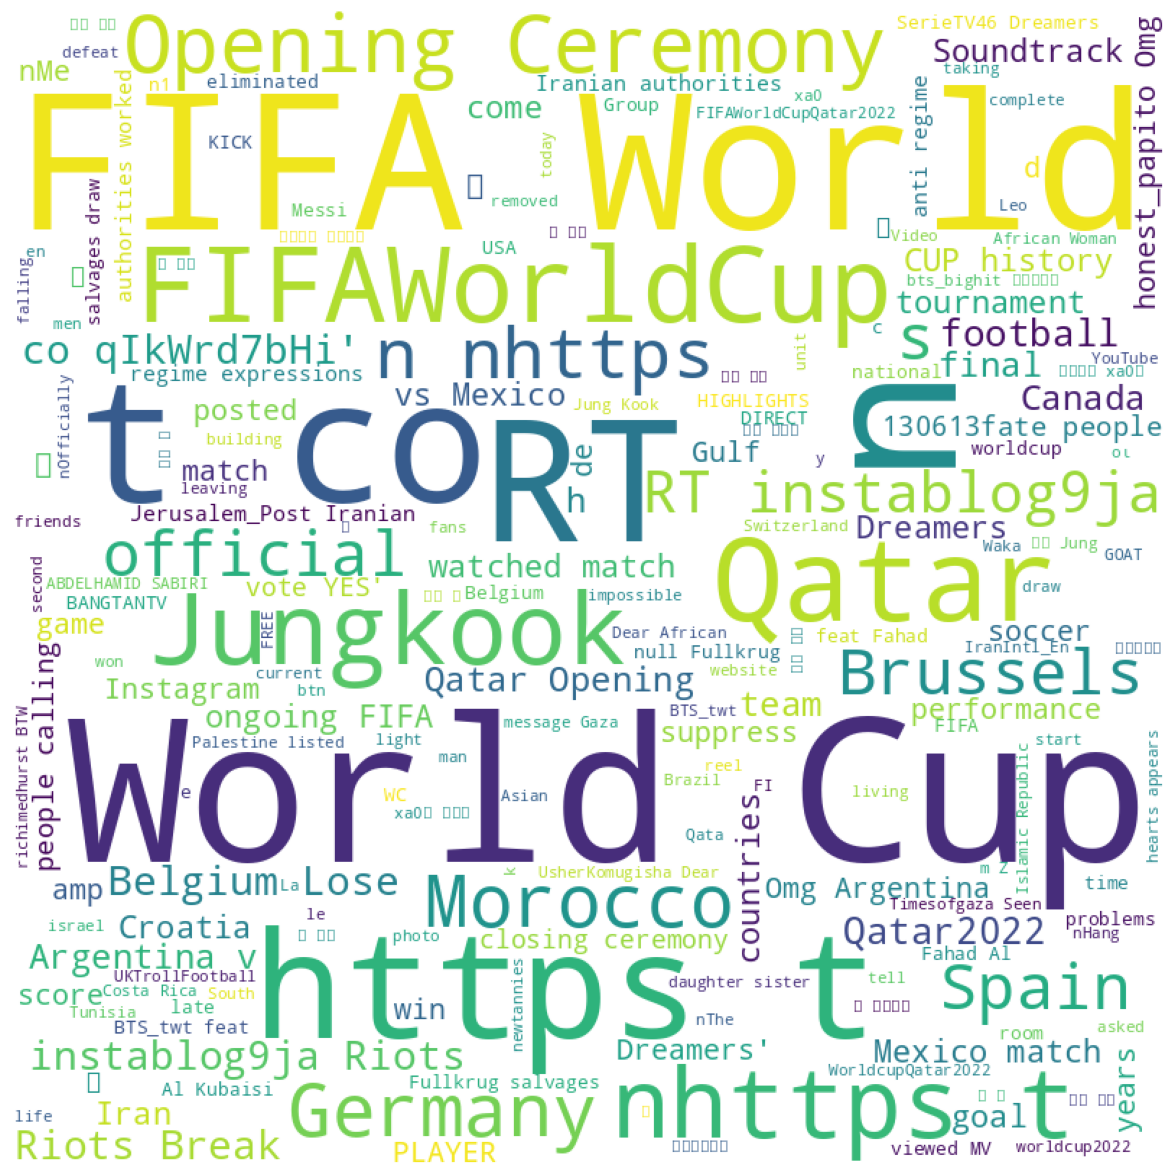

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Text blob

Para análisis de sentimientos, podemos entrenar nuestros propios modelos (como la clase pasada) o utilizar modelos ya entrenados (textblob, modelos de proveedores cloud como aws, azure, gcp, etc).

En este caso utilizaremos textblob.

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob("""I hate this movie""").sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [ ]:
TextBlob("""I love this movie""").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

Si queremos solo polarity:

In [ ]:
TextBlob("""My dog is beautiful""").sentiment.polarity

0.85

POLARITY

Puede tomar valores en el rango [-1, 1], donde -1 define un sentimiento negativo y 1 un sentimiento positivo.
Las palabras de negación, invierten la polaridad.

SUBJECTIVITY

Puede tomar valores en el rango [0, 1].
Cuantifica la cantidad de opinión personal que contiene el texto. Mientras más alta sea, significa que el texto contiene muchas opiniones personales en lugar de información basada en hechos.

EJERCICIO:

Escribir una función get_sentiment que dado un texto, nos retorne:
- la palabra "POS" si polarity > 0.1
- la palabra "NEU" si polarity ≥ -0.1 & polarity ≤ 0.1
- la palabra "NEG" si polarity < -0.1

Luego aplicarla a todo el df y almacenar resultados en la columna "SENTIMENT"

In [ ]:
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.1:
    return "POS"

  if sent >= -0.1 and sent <= 0.1:
    return "NEU"

  if sent < 0.1:
    return "NEG"

In [ ]:
get_sentiment("I love my dog")

'POS'

In [ ]:
def sent_analysis(text):
  sent1 = TextBlob(text).sentiment.polarity
  return sent1

In [ ]:
def sub_polarity(text):
  sent = TextBlob(text).sentiment.subjectivity
  return sent

In [ ]:
df["SENTIMENT"] = df["TWEET"].apply(get_sentiment)

In [ ]:
df["sentiment_analysis"] = df["TWEET"].apply(sent_analysis)

In [ ]:
df["SUB_POLARITY"] = df["TWEET"].apply(sub_polarity)

In [ ]:
df


,TWEET,NER,NOUNS,NOUN_CHUNKS,SENTENCES,SENTIMENT,SUB_POLARITY,sentiment_analysis
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,"[Fifa World Cup, Germany, 1-1, Spain]","[hopes, draw]","[(Germany), (hopes), (1, -, 1, draw), (Spain)]",1,NEU,0.400000,0.10
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Official Music Video | FIFA World Cup 2022 Official Soundtrack\n\nhttps://t.co/2vjhri8x19\n\n#Dream…","[Jung Kook, World Cup 2022 Official Soundtrack]","[@FIFAWorldCup, Dreamers, |, Dream]","[(RT, @FIFAWorldCup), ((, Jung, Kook), ("", Dreamers, "", Official, Music, Video, |, FIFA, World, Cup)]",2,NEU,0.000000,0.00
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FIFA World Cup opening ceremony ha superado 30 Millones de vistas en Y0uTube.\n\n🔗https://t.co/Mt0t…,"[YouTube 📊📽, FIFA World Cup, 30, Millones]","[@MinMxLove1, 📽, Dreamers, opening, ceremony, Y0uTube]","[(RT, @MinMxLove1), (YouTube, 📊, 📽, ️, \n\n, Dreamers), (FIFA, World, Cup, opening, ceremony), (Y0uTube), (🔗, https://t.co/Mt0, t)]",3,NEU,0.000000,0.00
3,"RT @Jungkook_SNS: “Dreamers” by JungKook is now the Most Used FIFA World Cup song audio on Instagram, surpassing “Waka Waka” by Shakira. It…","[JungKook, Instagram, Waka Waka, Shakira]","[Dreamers, song, audio]","[(RT), (“, Dreamers), (JungKook), (the, Most, Used, FIFA, World, Cup, song, audio), (Instagram), (“, Waka, Waka), (Shakira), (It)]",2,POS,0.500000,0.50
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 Soundtrack)"" by #JUNGKOOK of @BTS_twt feat. Fahad Al Kubaisi it's the most viewed MV in last…","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al Kubaisi]","[Dreamers, Soundtrack, #, JUNGKOOK, @BTS_twt, feat]","[(RT, @SerieTV46), (:, "", Dreamers), (FIFA, World, Cup), (Soundtrack), (#), (JUNGKOOK), (@BTS_twt, feat), (Fahad, Al, Kubaisi), (it), (the, most, viewed, MV)]",3,POS,0.500000,0.50
...,...,...,...,...,...,...,...,...
95,🇭🇷 picked up a huge win as 🇨🇦 became the second side to be eliminated from the @FIFAWorldCup\n\nWatch the highlights 👇\n\n#FIFAWorldCup #Qatar2022 \n\nhttps://t.co/MCFHkyg0hV,[second],"[win, side, @FIFAWorldCup, highlights, FIFAWorldCup]","[(🇭), (🇷), (a, huge, win), (🇨, 🇦), (the, second, side), (the, @FIFAWorldCup), (the, highlights), (#, FIFAWorldCup), (#, Qatar2022, \n\n, https://t.co/MCFHkyg0hV)]",1,POS,0.433333,0.40
96,"RT @richimedhurst: BTW, the official #FIFAWorldCup website only has Palestine listed under Asian countries, no israel. \n\nOfficially Qatar d…","[FIFAWorldCup, Palestine, Asian, israel, Qatar]","[FIFAWorldCup, website, countries]","[(BTW), (the, official, #, FIFAWorldCup, website), (Palestine), (Asian, countries), (no, israel), (Officially, Qatar)]",2,NEU,0.500000,0.00
97,"@JamalMusiala is the youngest player to start a Fifa World cup game of Germany since 1958. At the game of 19 years. today against Spain he was the best player, he really deserve the golden Boy Award https://t.co/DMW8mNaSM7","[Fifa, World cup, Germany, 1958, 19 years, today, Spain, Boy Award]","[player, cup, game, game, years, today, player]","[(@JamalMusiala), (the, youngest, player), (a, Fifa, , World, cup, game), (Germany), (the, game), (19, years), (Spain), (he), (the, best, player), (he), (the, golden, Boy, Award, https://t.co/DMW8mNaSM7)]",2,POS,0.360000,0.14
98,La RTS vit au rythme de la FIFA World Cup Qatar 2022™️ ! \n\nSondage : \nCameroun 🇨🇲 🆚 🇷🇸 Serbie \nSelon-vous qui sera le gagnant de ce match?\nSUIVEZ LES MATCHS EN DIRECT https://t.co/ns8PgDTWs3 \n#Qatar2022 | #FIFAWorldCup,"[La RTS vit, Qatar, 2022, Cameroun, Serbie, Selon, qui sera, FIFAWorldCup]","[™, Sondage, qui, sera, match, https://t.co/ns8PgDTWs3, Qatar2022, |, FIFAWorldCup]","[(La, RTS, vit), (rythme, de, la, FIFA, World, Cup, Qatar), (Sondage), (Cameroun, 🇨, 🇲, 🆚, 🇷, 🇸, Serbie, \n, Selon, -, vous, qui, sera, le, gagnant, de, ce, match), (SUIVEZ, LES), (EN, DIRECT, https://t.co/ns8PgDTWs3), (|)]",3,NEU,0.400000,0.10


In [ ]:
df.head()

,TWEET,NER,NOUNS,NOUN_CHUNKS,SENTENCES,SENTIMENT,SUB_POLARITY,sentiment_analysis
0,Fifa World Cup: Germany keep hopes alive after 1-1 draw with Spain https://t.co/EJ2HrUDJOq,"[Fifa World Cup, Germany, 1-1, Spain]","[hopes, draw]","[(Germany), (hopes), (1, -, 1, draw), (Spain)]",1,NEU,0.4,0.1
1,"RT @FIFAWorldCup: 정국 (Jung Kook) ""Dreamers"" Official Music Video | FIFA World Cup 2022 Official Soundtrack\n\nhttps://t.co/2vjhri8x19\n\n#Dream…","[Jung Kook, World Cup 2022 Official Soundtrack]","[@FIFAWorldCup, Dreamers, |, Dream]","[(RT, @FIFAWorldCup), ((, Jung, Kook), ("", Dreamers, "", Official, Music, Video, |, FIFA, World, Cup)]",2,NEU,0.0,0.0
2,RT @MinMxLove1: YouTube 📊📽️\n\nDreamers' at FIFA World Cup opening ceremony ha superado 30 Millones de vistas en Y0uTube.\n\n🔗https://t.co/Mt0t…,"[YouTube 📊📽, FIFA World Cup, 30, Millones]","[@MinMxLove1, 📽, Dreamers, opening, ceremony, Y0uTube]","[(RT, @MinMxLove1), (YouTube, 📊, 📽, ️, \n\n, Dreamers), (FIFA, World, Cup, opening, ceremony), (Y0uTube), (🔗, https://t.co/Mt0, t)]",3,NEU,0.0,0.0
3,"RT @Jungkook_SNS: “Dreamers” by JungKook is now the Most Used FIFA World Cup song audio on Instagram, surpassing “Waka Waka” by Shakira. It…","[JungKook, Instagram, Waka Waka, Shakira]","[Dreamers, song, audio]","[(RT), (“, Dreamers), (JungKook), (the, Most, Used, FIFA, World, Cup, song, audio), (Instagram), (“, Waka, Waka), (Shakira), (It)]",2,POS,0.5,0.5
4,"RT @SerieTV46: ""Dreamers (FIFA World Cup 2022 Soundtrack)"" by #JUNGKOOK of @BTS_twt feat. Fahad Al Kubaisi it's the most viewed MV in last…","[World Cup 2022 Soundtrack, JUNGKOOK, Fahad Al Kubaisi]","[Dreamers, Soundtrack, #, JUNGKOOK, @BTS_twt, feat]","[(RT, @SerieTV46), (:, "", Dreamers), (FIFA, World, Cup), (Soundtrack), (#), (JUNGKOOK), (@BTS_twt, feat), (Fahad, Al, Kubaisi), (it), (the, most, viewed, MV)]",3,POS,0.5,0.5


Ahora ya tenemos muchos datos sobre nuestro texto: Entidades, sustantivos, cantidad de oraciones, sentimiento.

Con todos estos datos, responder:

1) Cuántas ORACIONES hay asociadas a cada sentimiento (POS, NEG, NEU) ?

In [ ]:
df.groupby("SENTIMENT").agg({"SENTENCES": "sum"})

,SENTENCES
SENTIMENT,
NEG,22
NEU,127
POS,45


2) Cuáles son los 10 sustantivos más negativos? Y los más positivos? (Noun)

In [ ]:
noun_sentiments = df.explode("NOUNS").groupby(["NOUNS", "SENTIMENT"], as_index=False).agg({"TWEET": "count"})
noun_sentiments.head()

,NOUNS,SENTIMENT,TWEET
0,#,NEU,6
1,#,POS,4
2,+102,NEU,1
3,@BTS_twt,NEG,1
4,@BTS_twt,POS,3


In [ ]:
noun_sentiments[noun_sentiments.SENTIMENT == "NEG"].sort_values(by="TWEET", ascending=False).head(10)

,NOUNS,SENTIMENT,TWEET
87,daughter,NEG,2
46,Qata,NEG,2
160,photo,NEG,2
104,friends,NEG,2
175,room,NEG,2
182,sister,NEG,2
140,living,NEG,2
33,FIFAWorldCup,NEG,2
230,천재꾀꼬리가,NEG,2
15,@bts_bighit,NEG,2


In [ ]:
noun_sentiments[noun_sentiments.SENTIMENT == "POS"].sort_values(by="TWEET", ascending=False).head(10)

,NOUNS,SENTIMENT,TWEET
143,match,POS,10
114,history,POS,5
29,Dreamers,POS,5
1,#,POS,4
97,feat,POS,3
41,JUNGKOOK,POS,3
205,win,POS,3
4,@BTS_twt,POS,3
35,FIFAWorldCup,POS,3
54,Soundtrack,POS,3
